# DeMo Preprocessed Data Visualization

This notebook provides interactive visualization capabilities for the preprocessed DeMo autonomous vehicle trajectory data. You can explore different scenarios, visualize agent trajectories, map elements, and analyze the data interactively.

## 1. Import Required Libraries

Import necessary libraries and the custom visualization module.

In [128]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os
import sys
import warnings
from typing import List, Optional  # Add typing imports
import importlib
warnings.filterwarnings('ignore')

# Add the project root to Python path
project_root = Path.cwd()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Import and reload the module to ensure we get the latest version
import src.utils.data_visualization as viz_module
importlib.reload(viz_module)

# Import custom visualization module
from src.utils.data_visualization import (
    DataSelector, DataLoader, TrajectoryVisualizer, EgoOtherVisualizer,
    DEFAULT_VIZ_CONFIG, display_agent_information, display_scenario_statistics,
    get_available_files, display_file_info, explore_scenario, visualize_ego_vs_others,
    plot_ego_velocity_analysis, create_velocity_plots, create_integrated_ego_analysis
)

# Try to import ipywidgets for interactive controls
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output
    WIDGETS_AVAILABLE = True
except ImportError:
    print("Warning: ipywidgets not available. Interactive controls will be limited.")
    WIDGETS_AVAILABLE = False

# Set matplotlib style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("All required libraries and visualization module imported successfully!")

All required libraries and visualization module imported successfully!


## 2. Set Up Data Paths and Parameters

Define the base path to DeMo_processed directory and check available data.

In [129]:
# Base path to preprocessed data
BASE_DATA_PATH = Path("data/DeMo_processed")

# Check if data directory exists
if not BASE_DATA_PATH.exists():
    print(f"ERROR: Data directory {BASE_DATA_PATH} not found!")
    print("Please ensure the preprocessed data is available in the correct location.")
else:
    print(f"Data directory found: {BASE_DATA_PATH}")
    
    # Check available splits
    available_splits = []
    for split in ['train', 'val', 'test']:
        split_path = BASE_DATA_PATH / split
        if split_path.exists():
            available_splits.append(split)
            
    print(f"Available data splits: {available_splits}")

Data directory found: data/DeMo_processed
Available data splits: ['train', 'val', 'test']


## 3. Load Available Data Files

Scan the DeMo_processed directory to discover all available preprocessed data files.

In [130]:
# Load files for each available split
all_files = {}
for split in available_splits:
    files = get_available_files(BASE_DATA_PATH, split)
    all_files[split] = files
    print(f"\n{split.upper()} split:")
    display_file_info(files)


TRAIN split:
Found 37914 files:
Sample files:
  1. scenario_0001f576-0552-49c9-9ce2-8c47411a088e.pt
  2. scenario_0001fe2b-a3c8-4cdf-a712-6b65a17ca316.pt
  3. scenario_0003904f-371d-4544-8712-5f4eff74ef91.pt
  4. scenario_0003e31e-8142-47af-9215-b8a306a31bc9.pt
  5. scenario_00052182-d782-4196-a025-a9916aaae4d6.pt
  ... and 37909 more files

VAL split:
Found 24988 files:
Sample files:
  1. scenario_00010486-9a07-48ae-b493-cf4545855937.pt
  2. scenario_00062a32-8d6d-4449-9948-6fedac67bfcd.pt
  3. scenario_0006ca28-fcbb-4ae2-9d9e-951fa3b41c1c.pt
  4. scenario_0007df76-c9a2-47aa-83bf-3b2b414109c9.pt
  5. scenario_0015197d-b916-43b6-bcaa-8a7d90d7b87d.pt
  ... and 24983 more files

TEST split:
Found 24984 files:
Sample files:
  1. scenario_0000b329-f890-4c2b-93f2-7e2413d4ca5b.pt
  2. scenario_0008c251-e9b0-4708-b762-b15cb6effc27.pt
  3. scenario_0008eb72-8351-4356-8c24-08c10cf34175.pt
  4. scenario_000a45e7-bded-43e7-970b-18c08cc86c2d.pt
  5. scenario_000c5b17-084c-4268-8d49-0cb317458cee.p

## 4. Initialize Visualization Components

Create instances of all visualization components.

In [131]:
# Create visualization components
data_selector = DataSelector(all_files)
data_loader = DataLoader()
visualizer = TrajectoryVisualizer(data_loader, DEFAULT_VIZ_CONFIG)
ego_other_visualizer = EgoOtherVisualizer(data_loader, DEFAULT_VIZ_CONFIG)

print("=== Visualization Components Initialized ===")
print(f"Available splits: {list(all_files.keys())}")
for split in all_files.keys():
    print(f"{split}: {len(all_files[split])} files")

=== Visualization Components Initialized ===
Available splits: ['train', 'val', 'test']
train: 37914 files
val: 24988 files
test: 24984 files


## 9. Ego vs. Others Visualization with Velocity Analysis

Modify the parameters below to customize the ego vs. other vehicles visualization with optional velocity analysis.

=== Ego vs. Others Visualization with Velocity Analysis ===
Split: train
Scenario Index: None (Random)
Show Lanes: True
Show Agent IDs: True
Show Velocity Analysis: True
Velocity Mode: separate

Selected random file from train: scenario_d681ee07-d251-41a4-8cc9-cc25d35ef3ce.pt
Successfully loaded: scenario_d681ee07-d251-41a4-8cc9-cc25d35ef3ce.pt
=== Ego vs. Others Visualization - TRAIN Split ===
=== Data Summary ===
scenario_id: d681ee07-d251-41a4-8cc9-cc25d35ef3ce
city: miami
num_agents: 26
num_timesteps: 110
num_lanes: 60
focal_agent_idx: 0
num_scored_agents: 0



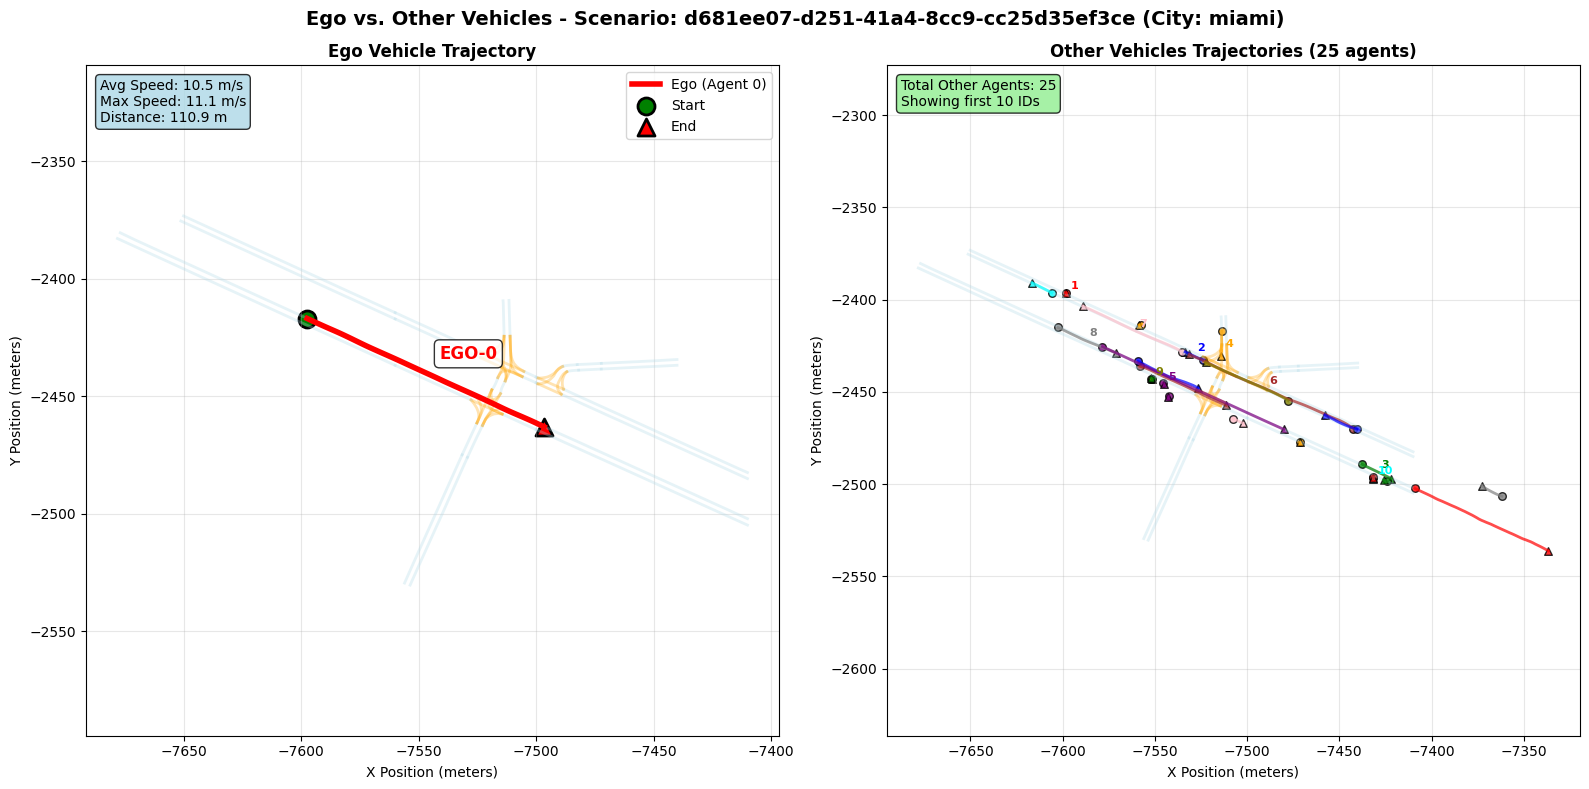


=== Velocity Analysis ===


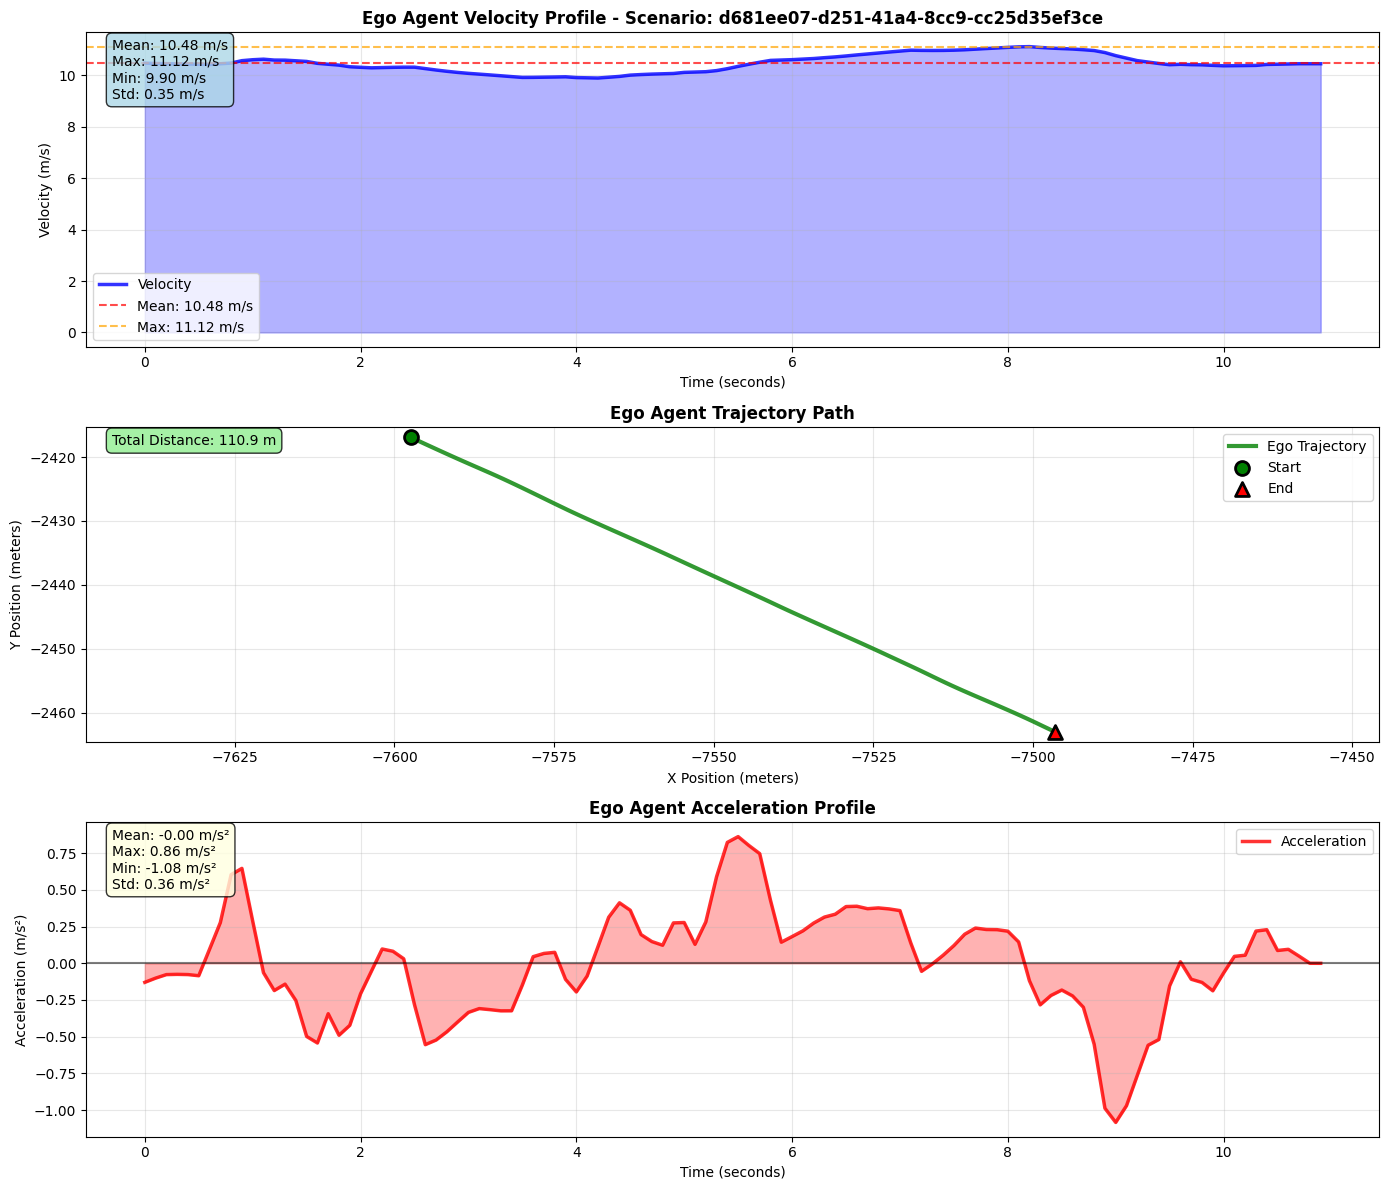


=== Ego Agent Motion Analysis Summary ===
Scenario ID: d681ee07-d251-41a4-8cc9-cc25d35ef3ce
City: miami
Ego Agent Index: 0
Duration: 110 timesteps (11.0 seconds)

Velocity Statistics:
  Average: 10.48 m/s (37.7 km/h)
  Maximum: 11.12 m/s (40.0 km/h)
  Minimum: 9.90 m/s (35.6 km/h)
  Standard Deviation: 0.35 m/s

Acceleration Statistics:
  Average: -0.00 m/s²
  Maximum: 0.86 m/s²
  Minimum: -1.08 m/s²
  Standard Deviation: 0.36 m/s²


In [136]:
# === EGO VS. OTHERS VISUALIZATION WITH VELOCITY ANALYSIS ===
# Modify these parameters for customized ego vs. other vehicles visualization

# 1. Choose dataset split and scenario
EGO_SPLIT = 'train'  # Options: 'train', 'val', 'test'
EGO_SCENARIO_INDEX = None  # Use None for random, or specify an index

# 2. Visualization options
EGO_SHOW_LANES = True      # Show lane/map information
EGO_SHOW_AGENT_IDS = True  # Show agent ID labels

# 3. Velocity analysis options
EGO_SHOW_VELOCITY = True   # Include velocity and acceleration analysis
EGO_VELOCITY_MODE = 'separate'  # Options: 'integrated' (combined view), 'separate' (separate plots)

print("=== Ego vs. Others Visualization with Velocity Analysis ===")
print(f"Split: {EGO_SPLIT}")
print(f"Scenario Index: {EGO_SCENARIO_INDEX} ({'Random' if EGO_SCENARIO_INDEX is None else 'Specific'})")
print(f"Show Lanes: {EGO_SHOW_LANES}")
print(f"Show Agent IDs: {EGO_SHOW_AGENT_IDS}")
print(f"Show Velocity Analysis: {EGO_SHOW_VELOCITY}")
print(f"Velocity Mode: {EGO_VELOCITY_MODE}")
print()

# Execute the ego vs. others visualization with velocity analysis
visualize_ego_vs_others(
    data_selector, data_loader, ego_other_visualizer,
    split=EGO_SPLIT,
    scenario_index=EGO_SCENARIO_INDEX,
    show_lanes=EGO_SHOW_LANES,
    show_agent_ids=EGO_SHOW_AGENT_IDS,
    show_velocity=EGO_SHOW_VELOCITY,
    velocity_analysis_mode=EGO_VELOCITY_MODE
)

## 9.1. Optional: Standalone Velocity Analysis

For detailed velocity analysis of the current loaded scenario, you can use the functions below independently.

In [133]:
# === OPTIONAL: STANDALONE VELOCITY ANALYSIS ===
# Uncomment and run the code below if you want detailed velocity analysis
# for the currently loaded scenario (independent of the visualization above)

# # Analyze velocity data for the current scenario
# velocity_data = plot_ego_velocity_analysis(data_loader, show_acceleration=True)
# 
# if velocity_data is not None:
#     # Create detailed velocity plots
#     create_velocity_plots(velocity_data, figure_size=(14, 12))
#     
#     # Print detailed statistics
#     print("=== Detailed Motion Analysis ===")
#     metadata = velocity_data['metadata']
#     print(f"Scenario: {metadata['scenario_id']} (City: {metadata['city']})")
#     print(f"Ego Agent: {metadata['focal_agent_idx']}")
#     print(f"Duration: {len(velocity_data['timesteps']) * 0.1:.1f} seconds")
#     print(f"Total Distance: {velocity_data['total_distance']:.1f} meters")

print("📊 Velocity analysis functions are now integrated into visualize_ego_vs_others()")
print("💡 Set EGO_SHOW_VELOCITY=True and choose 'integrated' or 'separate' mode above")
print("🔧 Uncomment the code above for standalone detailed velocity analysis")

📊 Velocity analysis functions are now integrated into visualize_ego_vs_others()
💡 Set EGO_SHOW_VELOCITY=True and choose 'integrated' or 'separate' mode above
🔧 Uncomment the code above for standalone detailed velocity analysis


## 10. Advanced Usage

Examples of more advanced usage patterns and direct access to visualization components.

In [134]:
# === ADVANCED USAGE EXAMPLES ===

# Example 1: Load a specific scenario and explore it step by step
print("=== Advanced Example 1: Step-by-step Exploration ===")

# Load a specific file
file_path = data_selector.select_file_by_index('train', 0)
if file_path:
    data_loader.load_scenario(file_path)
    
    # Print summary
    data_loader.print_summary()
    
    # Display agent information
    display_agent_information(data_loader)
    
    # Plot velocity profile for focal agent
    focal_idx = data_loader.current_metadata['focal_agent_idx']
    print(f"\nPlotting velocity profile for focal agent {focal_idx}:")
    # visualizer.plot_velocity_profile(focal_idx)
else:
    print("No file found for advanced example.")

=== Advanced Example 1: Step-by-step Exploration ===
Selected file 0 from train: scenario_0001f576-0552-49c9-9ce2-8c47411a088e.pt
Successfully loaded: scenario_0001f576-0552-49c9-9ce2-8c47411a088e.pt
=== Data Summary ===
scenario_id: 0001f576-0552-49c9-9ce2-8c47411a088e
city: pittsburgh
num_agents: 75
num_timesteps: 110
num_lanes: 39
focal_agent_idx: 24
num_scored_agents: 1
=== Agent Information ===
Scenario ID: 0001f576-0552-49c9-9ce2-8c47411a088e
City: pittsburgh
Total Agents: 75
Focal Agent Index: 24
Number of Scored Agents: 1
Total Timesteps: 110
Number of Lanes: 39

=== Individual Agent Details ===
 Agent Index Agent ID       Type Is Focal  Valid Timesteps Trajectory Length (m) Avg Velocity (m/s) Max Velocity (m/s)
           0    28124    Vehicle                       103                  16.7               0.00               0.00
           1    28245    Vehicle                        44                   0.3               0.00               0.00
           2    28366    Vehicle